In [27]:
import pandas as pd


In [28]:
df=pd.read_csv('twitter_training.csv')

In [29]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [30]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [31]:
df['Positive'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [32]:
df['Positive'].value_counts()

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [33]:
df['Borderlands'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [34]:
df.drop('Borderlands',axis=1,inplace=True)

In [35]:
df.drop('2401',axis=1,inplace=True)

In [36]:
df.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [37]:
df=df.rename(columns={'Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'comment'})

In [38]:
df.dropna(inplace=True)

In [39]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

### preprocessing

In [40]:
nltk.download('stopwords')

stemmer=PorterStemmer()
stopword=set(stopwords.words('english'))
def preprocess(text):
  text=re.sub(r'[^a-zA-Z]',' ',text,re.I|re.A)

  text=text.lower()
  text=text.split()
  text=[stemmer.stem(word) for word in text if not word in stopword]
  text=' '.join(text)
  return text


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muhammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
df['prep_comment']=df['comment'].apply(lambda x:preprocess(x))

In [42]:
df.head()

,Sentiment,comment,prep_comment
0,Positive,I am coming to the borders and I will kill you...,come border kill
1,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
2,Positive,im coming on borderlands and i will murder you...,im come borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,Positive,im getting into borderlands and i can murder y...,im get borderland murder


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer


### vectorization

In [44]:
vectorizer=TfidfVectorizer(max_features=1000)
x=vectorizer.fit_transform(df['prep_comment'])
y=df['Sentiment']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Model Creation

In [46]:

from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [48]:
pred_y=model.predict(x_test)

In [49]:
accuracy_score(pred_y,y_test)

0.780120278397189

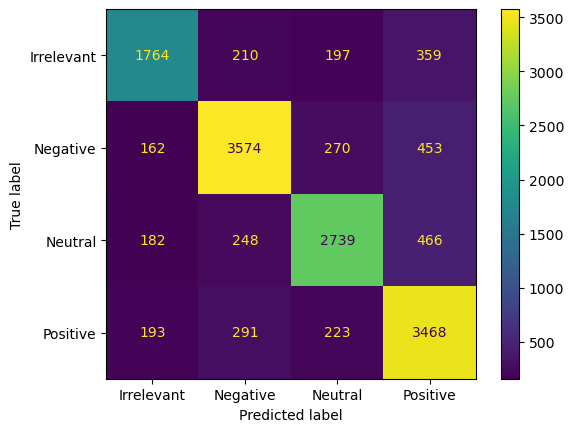

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_y)